In [44]:
import random
random.seed(0)

In [45]:
import tensorflow as tf
from tensorflow.keras import layers, datasets, models
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

np.random.seed(0)
tf.random.set_seed(0)

In [46]:
(X_train, y_train), (X_test, y_test) = datasets.cifar100.load_data()

In [47]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [48]:
# Split the data into test and validation data
X_test, X_valid, y_test, y_valid = train_test_split(X_test, y_test, test_size=0.7)

In [49]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_valid: {X_valid.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_valid: {y_valid.shape}")

Shape of X_train: (50000, 32, 32, 3)
Shape of X_test: (3000, 32, 32, 3)
Shape of X_valid: (7000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of y_test: (3000, 1)
Shape of y_valid: (7000, 1)


In [50]:
# Dataset class labels
labels =  ['apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle', 'bowl', 'boy', 'bridge', 'bus', 'butterfly',
           'camel', 'can', 'castle', 'caterpillar', 'cattle', 'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup',
           'dinosaur', 'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'computer_keyboard',
           'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain', 'mouse', 'mushroom',
           'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree', 'plain', 'plate', 'poppy', 'porcupine', 'possum',
           'rabbit', 'raccoon', 'ray', 'road', 'rocket', 'rose',
           'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider', 'squirrel', 'streetcar', 'sunflower', 'sweet_pepper',
           'table', 'tank', 'telephone', 'television', 'tiger', 'tractor', 'train', 'trout', 'tulip', 'turtle',
           'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm']

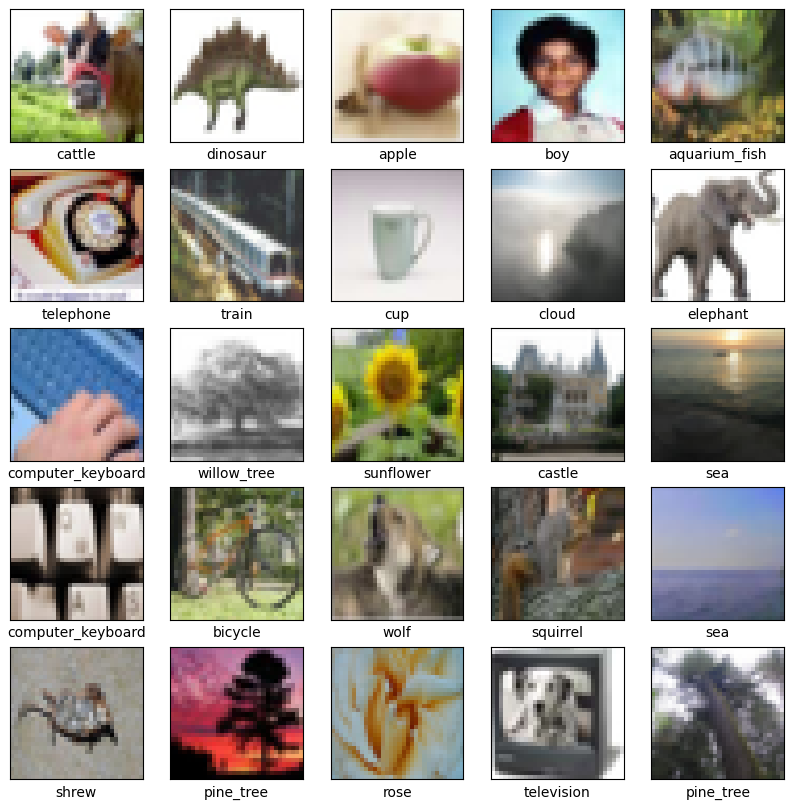

In [51]:
plt.figure(figsize = (10, 10))

for i in range(25):
  plt.subplot(5, 5, i + 1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(X_train[i], cmap = "gray")
  plt.xlabel(labels[y_train[i].astype(int)[0]])

plt.show()

In [52]:
from tensorflow.keras.utils import to_categorical

In [53]:
y_train = to_categorical(y_train, num_classes = 100)
y_test = to_categorical(y_test, num_classes = 100)
y_valid = to_categorical(y_valid, num_classes = 100)

In [54]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (32, 32, 3)))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPooling2D(2, 2))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = "relu"))
model.add(layers.Dense(128, activation = "relu"))
model.add(layers.Dense(100, activation = "softmax"))

In [55]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 30, 30, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_13 (Dropout)                 │ (None, 15, 15, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 13, 13, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 6, 6, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 4, 4, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 2, 2, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 270,372 (1.03 MB)

 Trainable params: 270,372 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
model.compile(optimizer = "adam",
              loss = tf.keras.losses.CategoricalCrossentropy(),
              metrics = ["accuracy"])

In [57]:
history = model.fit(X_train, y_train, epochs = 200, batch_size = 128, validation_data = (X_valid, y_valid))

Epoch 1/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.0301 - loss: 4.4108 - val_accuracy: 0.1031 - val_loss: 3.8431
Epoch 2/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.1277 - loss: 3.7096 - val_accuracy: 0.1761 - val_loss: 3.4555
Epoch 3/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.1851 - loss: 3.3724 - val_accuracy: 0.2280 - val_loss: 3.2029
Epoch 4/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.2212 - loss: 3.1731 - val_accuracy: 0.2543 - val_loss: 3.0533
Epoch 5/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2491 - loss: 3.0242 - val_accuracy: 0.2793 - val_loss: 2.9016
Epoch 6/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.2746 - loss: 2.9064 - val_accuracy: 0.2989 - val_loss: 2.8151
Epoch 7/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.2945 - loss: 2.8002 - val_accuracy: 0.3143 - val_loss: 2.7251
Epoch 8/200
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.3088 - loss: 2.7225 - val_a

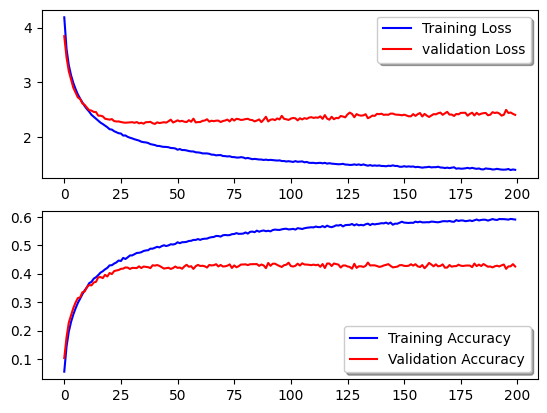

In [58]:
# Show Loss and Accuracy Plots
fig, ax = plt.subplots(2, 1)

ax[0].plot(history.history['loss'], color='b', label="Training Loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation Loss",axes=ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training Accuracy")
ax[1].plot(history.history['val_accuracy'], color='r', label="Validation Accuracy")
legend = ax[1].legend(loc='best', shadow=True)

In [59]:
# Evaluate model on validation data
_, evaluation_score = model.evaluate(X_test, y_test)
print(f'Evaluation Score: {int(evaluation_score * 100)} %')

94/94 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.4476 - loss: 2.3314
Evaluation Score: 45 %


94/94 - 0s - 2ms/step - accuracy: 0.4537 - loss: 2.3440


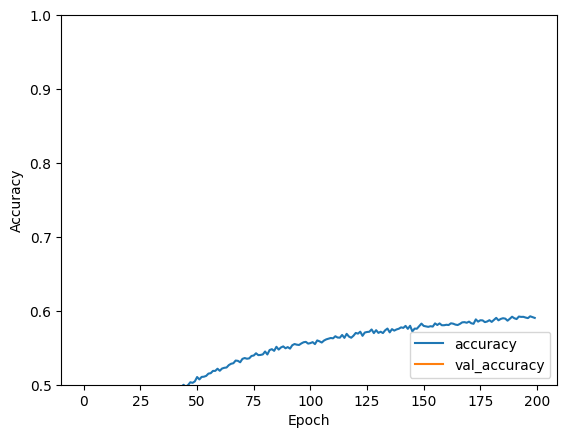

In [60]:
plt.plot(history.history["accuracy"], label = "accuracy")
plt.plot(history.history["val_accuracy"], label = "val_accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0.5, 1])
plt.legend(loc = "lower right")

test_loss, test_acc = model.evaluate(X_test, y_test, verbose = 2)

In [61]:
print(test_acc)

0.45366665720939636


In [63]:
model.save("cifar100tf.keras")